In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_goe_matrix(size):
  A = np.random.randn(size, size)
  return (A + A.T) / np.sqrt(2 * size)

def compute_eigenvalues(matrix):
  return np.linalg.eigvalsh(matrix)

eigall = []

for _ in range(num_matrices):
  goe_matrix = generate_goe_matrix(matrix_size)
  eigenvalues = compute_eigenvalues(goe_matrix)
  eigall.append(eigenvalues)

In [5]:
# Parameters
matrix_size = 100  # Size of the GOE matrix
num_matrices = 5000  # Number of matrices for ensemble averaging

In [6]:
e1 = np.array(eigall).flatten()

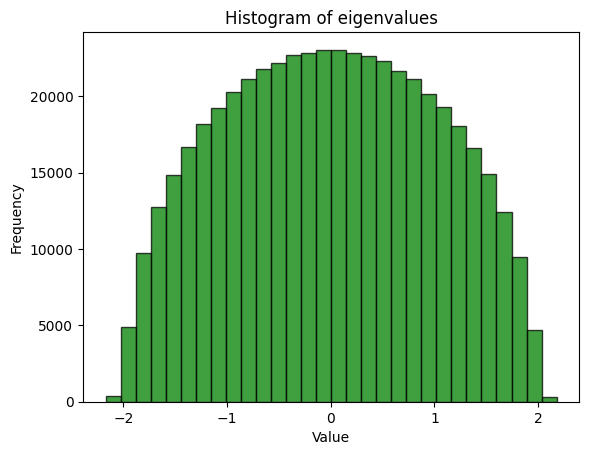

In [7]:
plt.hist(e1, bins=30, alpha=0.75, color='green', edgecolor='black')

# Add titles and labels
plt.title('Histogram of eigenvalues')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [8]:
def generate_gue_matrix(size):
  A = np.random.randn(size, size) + 1j * np.random.randn(size, size)
  return (A + np.conj(A).T) / np.sqrt(2 * size)

def compute_eigenvalues(matrix):
  return np.linalg.eigvalsh(matrix)

eigall = []

for _ in range(num_matrices):
  goe_matrix = generate_goe_matrix(matrix_size)
  eigenvalues = compute_eigenvalues(goe_matrix)
  eigall.append(eigenvalues)

# Parameters
matrix_size = 100  # Size of the GOE matrix
num_matrices= 500  # Number of matrices for ensemble averaging

In [9]:
e2 = np.array(eigall).flatten()

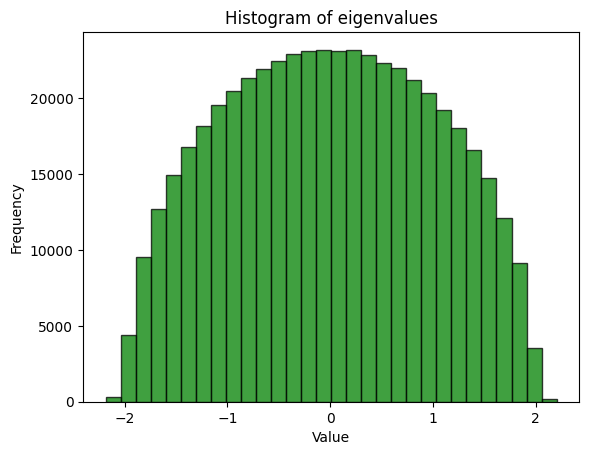

In [10]:
plt.hist(e2, bins=30, alpha=0.75, color='green', edgecolor='black')

# Add titles and labels
plt.title('Histogram of eigenvalues')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [5]:
pip install tqdm

In [9]:
from tqdm.auto import tqdm

  0%|          | 0/50 [00:00<?, ?it/s]

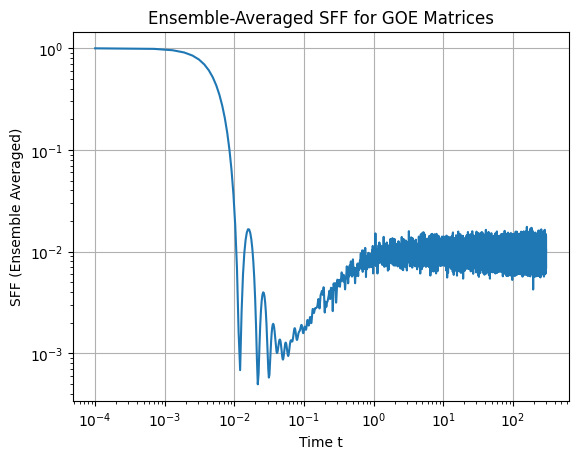

In [10]:
def spectral_form_factor(eigenvalues, t, delta=0.01):
    unfolded_spectrum = np.sort(eigenvalues)
    unfolded_spectrum -= np.mean(unfolded_spectrum)  # Centering
    spacing = np.diff(eigenvalues)
    mean_spacing = np.mean(spacing)
    unfolded_spectrum /= mean_spacing  # Normalize
    sff = np.abs(np.mean(np.exp(2j * np.pi * unfolded_spectrum[:, None] * t), axis=0)) ** 2
    return sff

def ensemble_average_sff(matrix_size, num_matrices, t_values):
    sff_ensemble = np.zeros_like(t_values, dtype=np.float64)

    for _ in tqdm(range(num_matrices)):
        goe_matrix = generate_goe_matrix(matrix_size)
        eigenvalues = compute_eigenvalues(goe_matrix)
        sff = spectral_form_factor(eigenvalues, t_values)
        sff_ensemble += sff

    return sff_ensemble / num_matrices

# Parameters
matrix_size = 100  # Size of the GOE matrix
num_matrices = 50  # Number of matrices for ensemble averaging
t_values = np.linspace(0.0001, 300, 500000)  # Time values for which to calculate SFF

# Perform ensemble averaging for SFF
sff_ensemble_avg = ensemble_average_sff(matrix_size, num_matrices, t_values)

# Plotting the ensemble-averaged Spectral Form Factor
plt.plot(t_values, sff_ensemble_avg)
#plt.plot(theta_list, sff)
plt.yscale("log"); plt.xscale("log");
plt.xlabel('Time t')
plt.ylabel('SFF (Ensemble Averaged)')
plt.title('Ensemble-Averaged SFF for GOE Matrices')
plt.grid(True)
plt.show()

In [27]:
############## Code from Martin Schnee #############
def sff_sums(spectrum, times_list):
    """
    This function computes the sum of complex phases involved in the calculation of the
    spectral form factor. from the spectrum of eigen- or singular
    values.
    \in
    spectrum : 1D-array of ordered eigen- or singular values.
    times_list : 1D-array of positive fictitious times.

    \out
    sff_sum_list :
    """
    sff_sum_list = []
    sff_norm_list = []

    for time in times_list:
        sff_sum = 0

        for value in spectrum:
            sff_sum += cm.exp(-1.j*time*value)
        sff_sum_list.append(sff_sum)
        sff_squared_norm = abs(sff_sum)**2
        sff_norm_list.append(sff_squared_norm)

    sff_sum_list = np.asarray(sff_sum_list)
    sff_norm_list = np.asarray(sff_norm_list)

    return sff_sum_list, sff_norm_list

0
10
20
30
40
50
60
70
80
90


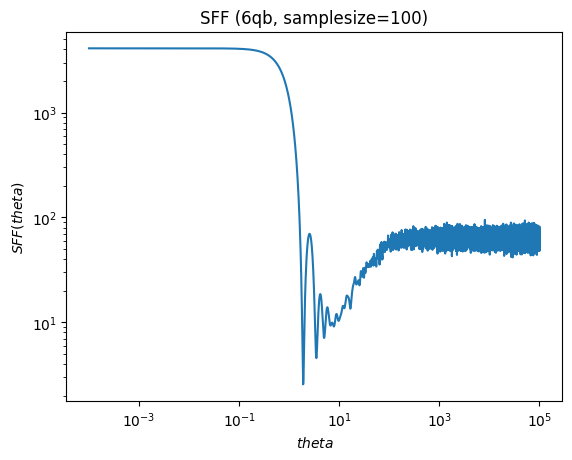

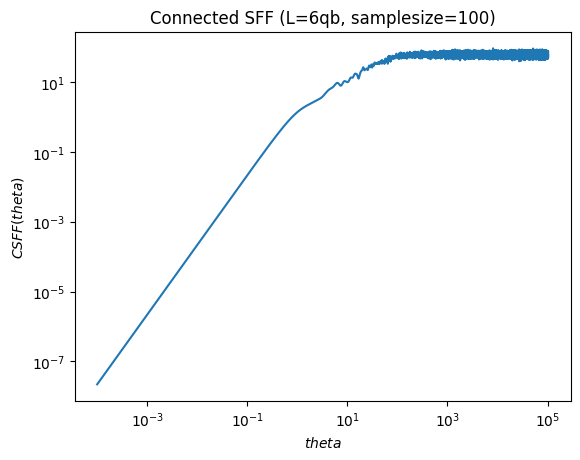

In [28]:
 ## CHECK (CONNECTED) SPECTRAL FORM FACTOR with GOE.
 ############## Code from Martin Schnee #############
L = 6
d = 2**L
theta_list = np.arange(0.01,320,0.01)**2
sample_size = 100
sffnorm_sample_array = []
sffsum_sample_array = []
for i in range(sample_size):
# Create random Hamiltonian (GOE).
  H_GOE = generate_goe_matrix(d)
        # Diagonalize it.
  e, v = np.linalg.eigh(H_GOE)
  del H_GOE
        # Compute SFF sums.
  sff_sum_list, sff_norm_list = sff_sums(e, theta_list)
        # Store for later averaging.
  sffsum_sample_array.append(sff_sum_list)  # array in which, for each sample, there is the list of sff sums (one for each value of theta).
  sffnorm_sample_array.append(sff_norm_list) # same for the norm of this sum.
        #
  if i%10==0: print(i)

    ## Compute sample averaged SFF:
sffnorm_sample_array = np.asarray(sffnorm_sample_array)
sff = sffnorm_sample_array.mean(axis=0)
    ## Compute sample averaged Conn.SFF = Disc. Part + Squared Norm Part :
sffsum_sample_array = np.asarray(sffsum_sample_array)
sample_averaged_sffsum = sffsum_sample_array.mean(axis=0)
sample_averaged_sffsum = np.asarray([abs(av_sffsum)**2 for av_sffsum in sample_averaged_sffsum])
conn_sff = sff - sample_averaged_sffsum

    ### SFF:
plt.plot(theta_list, sff)
plt.yscale("log"); plt.xscale("log");
plt.xlabel('$theta$'); plt.ylabel('$SFF(theta)$')
plt.title('SFF ('+str(L)+'qb, samplesize='+str(sample_size)+')')
plt.show()
### Connected SFF:
plt.plot(theta_list, conn_sff)
plt.yscale("log"); plt.xscale("log");
plt.xlabel('$theta$'); plt.ylabel('$CSFF(theta)$')
plt.title('Connected SFF (L='+str(L)+'qb, samplesize='+str(sample_size)+')')
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
e1 = np.array(eigall).flatten()

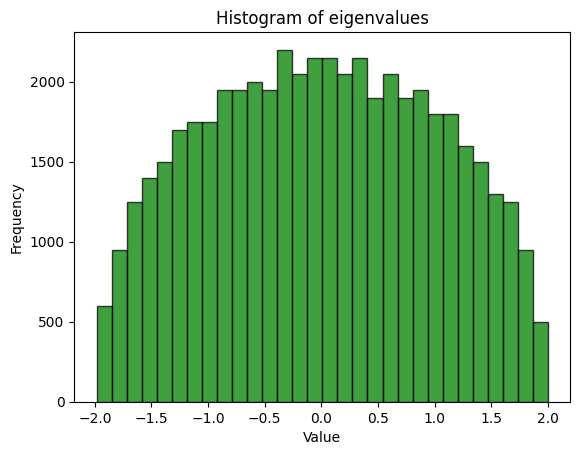

In [33]:
plt.hist(e1, bins=30, alpha=0.75, color='green', edgecolor='black')

# Add titles and labels
plt.title('Histogram of eigenvalues')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
 ## CHECK (CONNECTED) SPECTRAL FORM FACTOR with GOE.
 ############## Code from Martin Schnee #############
L = 6
d = 2**L
theta_list = np.arange(0.01,320,0.01)**2
sample_size = 1000
sffnorm_sample_array = []
sffsum_sample_array = []
for i in range(sample_size):
# Create random Hamiltonian (GOE).
  H_GOE = generate_goe_matrix(d)
        # Diagonalize it.
  e, v = np.linalg.eigh(H_GOE)
  del H_GOE
        # Compute SFF sums.
  sff_sum_list, sff_norm_list = sff_sums(e, theta_list)
        # Store for later averaging.
  sffsum_sample_array.append(sff_sum_list)  # array in which, for each sample, there is the list of sff sums (one for each value of theta).
  sffnorm_sample_array.append(sff_norm_list) # same for the norm of this sum.
        #
  if i%10==0:
    print(i)

    ## Compute sample averaged SFF:
sffnorm_sample_array = np.asarray(sffnorm_sample_array)
sff = sffnorm_sample_array.mean(axis=0)
    ## Compute sample averaged Conn.SFF = Disc. Part + Squared Norm Part :
sffsum_sample_array = np.asarray(sffsum_sample_array)
sample_averaged_sffsum = sffsum_sample_array.mean(axis=0)
sample_averaged_sffsum = np.asarray([abs(av_sffsum)**2 for av_sffsum in sample_averaged_sffsum])
conn_sff = sff - sample_averaged_sffsum

    ### SFF:
plt.plot(theta_list, sff)
plt.yscale("log"); plt.xscale("log");
plt.xlabel('$theta$'); plt.ylabel('$SFF(theta)$')
plt.title('SFF ('+str(L)+'qb, samplesize='+str(sample_size)+')')
plt.show()
### Connected SFF:
plt.plot(theta_list, conn_sff)
plt.yscale("log"); plt.xscale("log");
plt.xlabel('$theta$'); plt.ylabel('$CSFF(theta)$')
plt.title('Connected SFF (L='+str(L)+'qb, samplesize='+str(sample_size)+')')
plt.show()